###### Author: Mohlatlego Nakeng, MIT big data sciences (University of Pretoria,ZA)

###   Model 1:

1. Input : MMA false news data.

2. Clean Transformer

3. Vectorisation

4. Fit the pipeline
 * Train data
 * clean-Transformer
 * vetectorisation
 * OneClass SVM

## Text Classification - OneClass Classificaiton
The one-class algorithms are based on recognition since their aim is to recognize data from a particular class, and reject data from all other classes. This is accomplished by creating a boundary that encompasses all the data belonging to the target class within itself, so when a new sample arrives the algorithm only has to check whether it lies within the boundary or outside and accordingly classify the sample as belonging to the target class or the outlier.

In [2]:
# Load packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import OneClassSVM
from sklearn.utils import shuffle
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer
import string
import spacy
from spacy.lang.en import English
import preprocessor as p
# spacy.load("en_core_web_sm")
parser = English()
import warnings
warnings.filterwarnings('ignore')

In [3]:
sus = pd.read_csv("suspicious.csv")

In [4]:
sus

,Unnamed: 0,username,name,tweet,category
0,0,comrade0072,I thank you,@LadyhawkAnnie The fact that nobody has attemp...,accurate
1,1,comrade0072,I thank you,@Newzroom405 Maybe he needs Pfizer for the spear.,accurate
2,2,nuru_yochanan,Yochanan,"@__Inolofatse__ Fostofol I'm not your fan, sec...",accurate
3,3,azania109,Azania,@SundayTimesZA Asina ndaba we trust our own na...,accurate
4,4,muslimassocsa,Muslim Association of South Africa,As August comes to an end we look back at 27 d...,accurate
...,...,...,...,...,...
32608,32608,ndim_uchris,uTata ka Zama and others,Corona emo specialeng,accurate
32609,32609,collen_el,Collen Jay El'Padroni,@SbusisoMthimkul @mizar_CDXX Kodwa Bafo wena i...,accurate
32610,32610,em_jay7,High Sauce,Hahahaha re nwa Corona,accurate
32611,32611,fana__n,FANA,@lebohang_dh Inside joke yeah but I open beer ...,accurate


In [5]:
del sus["Unnamed: 0"] # removing index column

In [6]:
sus[sus['category'] == "suspicious"]

,username,name,tweet,category
75,azania109,Azania,"@mzwaimbeje Proof ? Am not vaccinated,alot of ...",suspicious
109,nuru_yochanan,Yochanan,"@News24 @Sport24news CR17, Phoenix massacre, h...",suspicious
179,cedricdebeer1,Cedric De Beer,"True. Plus there are the hesitant, and there a...",suspicious
211,mr_s_ayerst,Stephen Ayerst,"@russiancosmist Next, car license renewals for...",suspicious
215,pampie59,Thandeka,They couldnt get away with this one; They want...,suspicious
...,...,...,...,...
32425,nolencemashego,NOLENCE MASHEGO,Reports says Cocaine kills corona virus scient...,suspicious
32468,trevorbzungu,Trevor Zungu,So many ground staff at OR Tambo walking aroun...,suspicious
32556,bozzie_t,Certified Vaxxed Malume,Came to Diepkloof go tlo etsa ntho tsa ka and ...,suspicious
32563,katjanechild,Katharine Child,Prof on Corona virus. U waaaay more likely to...,suspicious


In [7]:
sus.tweet

0        @LadyhawkAnnie The fact that nobody has attemp...
1        @Newzroom405 Maybe he needs Pfizer for the spear.
2        @__Inolofatse__ Fostofol I'm not your fan, sec...
3        @SundayTimesZA Asina ndaba we trust our own na...
4        As August comes to an end we look back at 27 d...
                               ...                        
32608                                Corona emo specialeng
32609    @SbusisoMthimkul @mizar_CDXX Kodwa Bafo wena i...
32610                               Hahahaha re nwa Corona
32611    @lebohang_dh Inside joke yeah but I open beer ...
32612    @Juks_Afrika @VinDollar016 @nonhlanhla_Nox It’...
Name: tweet, Length: 32613, dtype: object

In [8]:
sus['tweet'].iloc[0]

"@LadyhawkAnnie The fact that nobody has attempted to steal the vaccine tells me that it has no value. Especially the thieving ANC members. If that does not convince you it's of no value.....nothing ever will."

In [9]:
sus['category'].unique()

array(['accurate', 'suspicious'], dtype=object)

In [10]:
sus['category'].value_counts()

accurate      31830
suspicious      783
Name: category, dtype: int64

<AxesSubplot:xlabel='category', ylabel='count'>

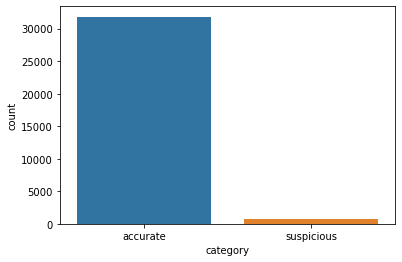

In [11]:
sns.countplot(sus['category'])

#### Data preparation

In [12]:
# change category labels
sus['label'] = sus['category'].map({'suspicious':1, 'accurate':-1})

In [13]:
sus['label'].value_counts()

-1    31830
 1      783
Name: label, dtype: int64

In [14]:
# creating a target class
sus_df = sus[sus['label'] == 1]

In [15]:
sus_df

,username,name,tweet,category,label
75,azania109,Azania,"@mzwaimbeje Proof ? Am not vaccinated,alot of ...",suspicious,1
109,nuru_yochanan,Yochanan,"@News24 @Sport24news CR17, Phoenix massacre, h...",suspicious,1
179,cedricdebeer1,Cedric De Beer,"True. Plus there are the hesitant, and there a...",suspicious,1
211,mr_s_ayerst,Stephen Ayerst,"@russiancosmist Next, car license renewals for...",suspicious,1
215,pampie59,Thandeka,They couldnt get away with this one; They want...,suspicious,1
...,...,...,...,...,...
32425,nolencemashego,NOLENCE MASHEGO,Reports says Cocaine kills corona virus scient...,suspicious,1
32468,trevorbzungu,Trevor Zungu,So many ground staff at OR Tambo walking aroun...,suspicious,1
32556,bozzie_t,Certified Vaxxed Malume,Came to Diepkloof go tlo etsa ntho tsa ka and ...,suspicious,1
32563,katjanechild,Katharine Child,Prof on Corona virus. U waaaay more likely to...,suspicious,1


In [16]:
sus_df

,username,name,tweet,category,label
75,azania109,Azania,"@mzwaimbeje Proof ? Am not vaccinated,alot of ...",suspicious,1
109,nuru_yochanan,Yochanan,"@News24 @Sport24news CR17, Phoenix massacre, h...",suspicious,1
179,cedricdebeer1,Cedric De Beer,"True. Plus there are the hesitant, and there a...",suspicious,1
211,mr_s_ayerst,Stephen Ayerst,"@russiancosmist Next, car license renewals for...",suspicious,1
215,pampie59,Thandeka,They couldnt get away with this one; They want...,suspicious,1
...,...,...,...,...,...
32425,nolencemashego,NOLENCE MASHEGO,Reports says Cocaine kills corona virus scient...,suspicious,1
32468,trevorbzungu,Trevor Zungu,So many ground staff at OR Tambo walking aroun...,suspicious,1
32556,bozzie_t,Certified Vaxxed Malume,Came to Diepkloof go tlo etsa ntho tsa ka and ...,suspicious,1
32563,katjanechild,Katharine Child,Prof on Corona virus. U waaaay more likely to...,suspicious,1


##### create train and test data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# create train and test data
train_text = sus_df['tweet'].tolist()
train_labels = sus_df['label'].tolist()

test_text = sus['tweet'].tolist()
test_labels = sus['label'].tolist()

In [19]:
type(train_text)

list

#### Tokenization

In [20]:
# stop words list
STOPLIST = set(stopwords.words('english') + list()) 
# special character
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”","''"]

In [21]:
# class for cleaning the text
class CleanTextTransformer(TransformerMixin):
    def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
            return {}

def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    return text

In [23]:
# getting features
vectorizer1 = CountVectorizer()

features1 = vectorizer1.fit_transform(train_text).toarray()
features1.shape

(783, 5110)

In [24]:
# getting features
vectorizer = HashingVectorizer(n_features=20,tokenizer=tokenizeText)

features = vectorizer.fit_transform(train_text).toarray()
features.shape

(783, 20)

In [25]:
# OneClassSVM algorithm
clf = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
pipe_clf = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('clf', clf)])

In [26]:
# fit OneClassSVM model 
pipe_clf.fit(train_text, train_labels)

Pipeline(steps=[('cleanText',
                 <__main__.CleanTextTransformer object at 0x000002C3026A4D90>),
                ('vectorizer',
                 HashingVectorizer(n_features=20,
                                   tokenizer=<function tokenizeText at 0x000002C3026AAB80>)),
                ('clf', OneClassSVM(gamma=0.1, nu=0.1))])

In [27]:
# validate OneClassSVM model with test set
preds_test = pipe_clf.predict(test_text)
preds_test

array([ 1,  1, -1, ...,  1,  1, -1], dtype=int64)

In [28]:
results = confusion_matrix(test_labels, preds_test) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(test_labels, preds_test)) 
print('Report : ')
print(classification_report(test_labels, preds_test)) 

Confusion Matrix :
[[14809 17021]
 [  125   658]]
Accuracy Score : 0.47425873118081746
Report : 
              precision    recall  f1-score   support

          -1       0.99      0.47      0.63     31830
           1       0.04      0.84      0.07       783

    accuracy                           0.47     32613
   macro avg       0.51      0.65      0.35     32613
weighted avg       0.97      0.47      0.62     32613



In [29]:
# OneClassSVM algorithm
clf1 = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
pipe_clf1= Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer1), ('clf', clf1)])

In [30]:
# fit OneClassSVM model 
pipe_clf1.fit(train_text, train_labels)

Pipeline(steps=[('cleanText',
                 <__main__.CleanTextTransformer object at 0x000002C3026BD5B0>),
                ('vectorizer', CountVectorizer()),
                ('clf', OneClassSVM(gamma=0.1, nu=0.1))])

In [31]:
# validate OneClassSVM model with test set
preds_test1 = pipe_clf1.predict(test_text)
preds_test1

array([-1,  1, -1, ...,  1,  1, -1], dtype=int64)

In [32]:
results = confusion_matrix(test_labels, preds_test1) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(test_labels, preds_test1)) 
print('Report : ')
print(classification_report(test_labels, preds_test1)) 

Confusion Matrix :
[[12157 19673]
 [  279   504]]
Accuracy Score : 0.3882194217030019
Report : 
              precision    recall  f1-score   support

          -1       0.98      0.38      0.55     31830
           1       0.02      0.64      0.05       783

    accuracy                           0.39     32613
   macro avg       0.50      0.51      0.30     32613
weighted avg       0.95      0.39      0.54     32613



In [41]:
text_sus = []
for index in preds_test:
    if index == 1:
        text = "suspicious"
    elif index == -1:
         text = "not suspicious"
    text_sus.append(text)

sus["class"] = text_sus

In [42]:
sus

,username,name,tweet,category,label,class
0,comrade0072,I thank you,@LadyhawkAnnie The fact that nobody has attemp...,accurate,-1,suspicious
1,comrade0072,I thank you,@Newzroom405 Maybe he needs Pfizer for the spear.,accurate,-1,suspicious
2,nuru_yochanan,Yochanan,"@__Inolofatse__ Fostofol I'm not your fan, sec...",accurate,-1,not suspicious
3,azania109,Azania,@SundayTimesZA Asina ndaba we trust our own na...,accurate,-1,suspicious
4,muslimassocsa,Muslim Association of South Africa,As August comes to an end we look back at 27 d...,accurate,-1,suspicious
...,...,...,...,...,...,...
32608,ndim_uchris,uTata ka Zama and others,Corona emo specialeng,accurate,-1,suspicious
32609,collen_el,Collen Jay El'Padroni,@SbusisoMthimkul @mizar_CDXX Kodwa Bafo wena i...,accurate,-1,not suspicious
32610,em_jay7,High Sauce,Hahahaha re nwa Corona,accurate,-1,suspicious
32611,fana__n,FANA,@lebohang_dh Inside joke yeah but I open beer ...,accurate,-1,suspicious


In [43]:
sus['class'].value_counts()

suspicious        17679
not suspicious    14934
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

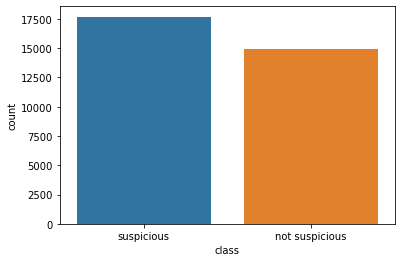

In [44]:
sns.countplot(sus['class'])

<AxesSubplot:xlabel='class'>

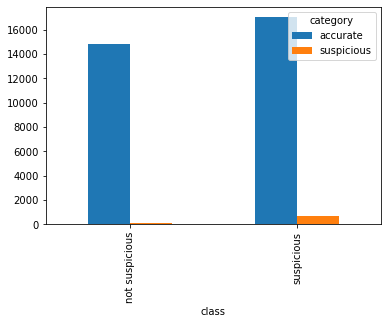

In [45]:
(sus
 .groupby(['class', 'category'])
 .size()
 .unstack()
 .plot.bar()
)

Text(0.5, 1.0, 'Number of normal tweets against misinformation')

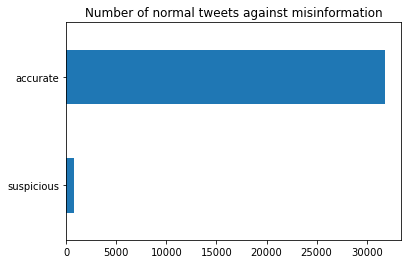

In [46]:
(sus['category']
 .value_counts(sort=False)
 .plot.barh()
 .set_title('Number of normal tweets against misinformation')
)